In [16]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"

In [4]:
df = pd.read_csv(url, names = ['sepal length', 'sepal width', 'petal length', 'petal width', 'target'])


In [5]:
df.head()

,sepal length,sepal width,petal length,petal width,target
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


# STANDARDIZE THE DATA
PCA is effected by scale so you need to scale the features in your data before applying PCA. Use StandardScaler to help you standardize the dataset’s features onto unit scale (mean = 0 and variance = 1) which is a requirement for the optimal performance of many machine learning algorithms

In [6]:
features = ['sepal length', 'sepal width', 'petal length', 'petal width']


In [14]:
x = df.loc[:, features].values
y = df.loc[:, ['target']].values

In [20]:
x = StandardScaler().fit_transform(x)


In [21]:
pca = PCA(n_components = 2)
PrincipalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame (data = PrincipalComponents, columns = ['PC1', 'PC2'])

In [22]:
finaldf = pd.concat([principalDf, df[['target']]], axis=1)

In [23]:
finaldf.head(10)

,PC1,PC2,target
0,-2.264542,0.505704,Iris-setosa
1,-2.086426,-0.655405,Iris-setosa
2,-2.367950,-0.318477,Iris-setosa
3,-2.304197,-0.575368,Iris-setosa
4,-2.388777,0.674767,Iris-setosa
5,-2.070537,1.518549,Iris-setosa
6,-2.445711,0.074563,Iris-setosa
7,-2.233842,0.247614,Iris-setosa
8,-2.341958,-1.095146,Iris-setosa
9,-2.188676,-0.448629,Iris-setosa


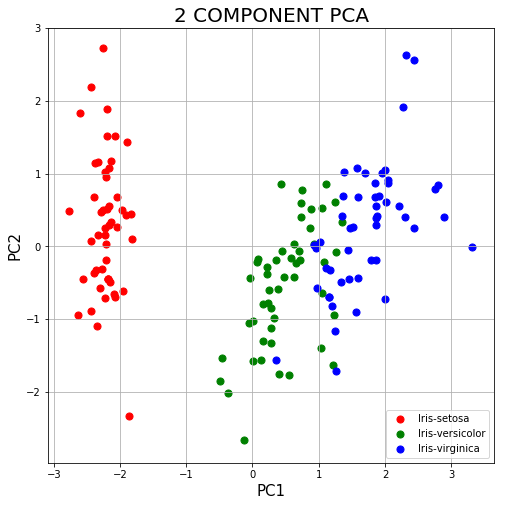

In [29]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('PC1', fontsize=15)
ax.set_ylabel('PC2', fontsize=15)
ax.set_title('2 COMPONENT PCA', fontsize = 20)
targets = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finaldf['target'] == target
    ax.scatter(finaldf.loc[indicesToKeep, 'PC1']
               , finaldf.loc[indicesToKeep, 'PC2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

# EXPLAINED VARIANCE

The explained variance tells you how much information (variance) can be attributed to each of the principal components. This is important as while you can convert 4 dimensional space to 2 dimensional space, you lose some of the variance (information) when you do this. By using the attribute explained_variance_ratio_, you can see that the first principal component contains 72.77% of the variance and the second principal component contains 23.03% of the variance. Together, the two components contain 95.80% of the information

In [30]:
pca.explained_variance_ratio_

array([0.72770452, 0.23030523])

# TO SPEED UP ML ALGORITHMS


In [85]:
from sklearn.datasets import fetch_mldata

In [51]:
from sklearn.datasets.mldata import fetch_mldata

In [47]:
from sklearn.datasets.base import get_data_home 

In [48]:
print (get_data_home())

C:\Users\sunil\scikit_learn_data


In [61]:
mnist = fetch_mldata('MNIST original') 
# mnist

{'DESCR': 'mldata.org dataset: mnist-original',
 'COL_NAMES': ['label', 'data'],
 'target': array([0., 0., 0., ..., 9., 9., 9.]),
 'data': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)}

In [83]:
# images
mnist.data.shape

(70000, 784)

In [84]:
mnist.target.shape # labels


(70000,)

In [62]:
from sklearn.model_selection import train_test_split

In [66]:
train_img, test_img, train_lbl, test_lbl = train_test_split(mnist.data, mnist.target, test_size=1/7.0, random_state=0)

# Standardization

In [67]:
scaler= StandardScaler()
scaler.fit(train_img)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype uint8 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


StandardScaler(copy=True, with_mean=True, with_std=True)

In [68]:
train_img = scaler.transform(train_img)
test_img  = scaler.transform(test_img)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype uint8 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype uint8 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [69]:
# make an instance of the model
pca = PCA(.95)

In [70]:
pca.fit(train_img)

PCA(copy=True, iterated_power='auto', n_components=0.95, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [71]:
train_img = pca.transform(train_img)
test_img = pca.transform(test_img)

In [72]:
# apply logistic regression to the transformed data
from sklearn.linear_model import LogisticRegression

In [73]:
#default solver is incredibly slow ..which is why it was changed to 'lbfgs'
logisticRege = LogisticRegression(solver = 'lbfgs')

In [77]:
s = logisticRege.fit(train_img,train_lbl)
s

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='lbfgs', tol=0.0001,
          verbose=0, warm_start=False)

In [78]:
logisticRege.predict(test_img[0:10])

array([1., 9., 2., 2., 7., 1., 8., 3., 3., 7.])

In [79]:
logisticRege.score(test_img,test_lbl)

0.92

In [81]:
pca.n_components_

330

# credit data

In [89]:
import pandas as pd
credit= pd.read_csv("C:/Users/sunil/Documents/PYTHON/Machine Learning/credit-default.csv")
credit.head()

,checking_balance,months_loan_duration,credit_history,purpose,amount,savings_balance,employment_length,installment_rate,personal_status,other_debtors,...,property,age,installment_plan,housing,existing_credits,default,dependents,telephone,foreign_worker,job
0,< 0 DM,6,critical,radio/tv,1169,unknown,> 7 yrs,4,single male,none,...,real estate,67,none,own,2,1,1,yes,yes,skilled employee
1,1 - 200 DM,48,repaid,radio/tv,5951,< 100 DM,1 - 4 yrs,2,female,none,...,real estate,22,none,own,1,2,1,none,yes,skilled employee
2,unknown,12,critical,education,2096,< 100 DM,4 - 7 yrs,2,single male,none,...,real estate,49,none,own,1,1,2,none,yes,unskilled resident
3,< 0 DM,42,repaid,furniture,7882,< 100 DM,4 - 7 yrs,2,single male,guarantor,...,building society savings,45,none,for free,1,1,2,none,yes,skilled employee
4,< 0 DM,24,delayed,car (new),4870,< 100 DM,1 - 4 yrs,3,single male,none,...,unknown/none,53,none,for free,2,2,2,none,yes,skilled employee


In [90]:
credit_dummies=pd.get_dummies(credit)
credit_dummies.shape

(1000, 62)

In [91]:
from sklearn.model_selection import train_test_split
train,test=train_test_split(credit_dummies, test_size=0.3, random_state=100)
train_x=train.drop('default', axis=1)
test_x = test.drop('default', axis=1)
train_y= train['default']
test_y= test['default']

In [92]:
from sklearn.ensemble import RandomForestClassifier
m1 = RandomForestClassifier(random_state=100)
m1.fit(train_x, train_y)
test_pred1 = m1.predict(test_x) 
from sklearn.metrics import accuracy_score, classification_report
print(accuracy_score( test_y, test_pred1))
print(classification_report(test_y, test_pred1))


0.76
             precision    recall  f1-score   support

          1       0.79      0.91      0.85       219
          2       0.60      0.35      0.44        81

avg / total       0.74      0.76      0.74       300



# with PCA

In [93]:
m2=RandomForestClassifier(random_state=100)
scaler = StandardScaler()
scaler.fit(train_x)
train_x_scaled = scaler.transform(train_x)
test_x_scaled =  scaler.transform(test_x)
pc_transformer=PCA()
pc_transformer.fit(train_x_scaled)
pcs_train = pc_transformer.transform(train_x_scaled)
pcs_test=pc_transformer.transform(test_x_scaled)

In [94]:
# fiting the data to the forest
#passing input
m2.fit(pcs_train, train_y)
test_pred2=m2.predict(pcs_test)
print(accuracy_score( test_y, test_pred2,))
print(classification_report(test_y,test_pred2))

0.74
             precision    recall  f1-score   support

          1       0.77      0.91      0.84       219
          2       0.54      0.27      0.36        81

avg / total       0.71      0.74      0.71       300

